In [1]:
import numpy as np 
from qiskit import QuantumCircuit, BasicAer, IBMQ, execute
from qiskit.visualization import plot_histogram

In [2]:
n = 3

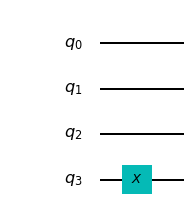

In [3]:
const_oracle = QuantumCircuit(n+1)
output = np.random.randint(2)

if output == 1:
    const_oracle.x(n)
    
const_oracle.draw(output='mpl')

In [4]:
balanced_oracle = QuantumCircuit(n+1)

In [5]:
b_str = '101'

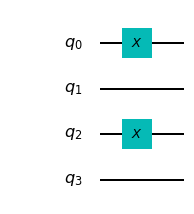

In [6]:
for index, value in enumerate(b_str):
    if value == '1':
        balanced_oracle.x(index)

balanced_oracle.draw(output='mpl')

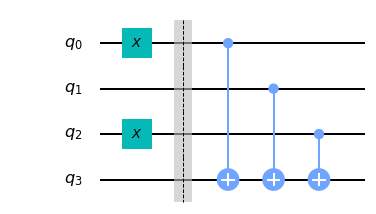

In [7]:
balanced_oracle.barrier()
for qubit in range(n):
    balanced_oracle.cx(qubit, n)
    
balanced_oracle.draw(output='mpl')

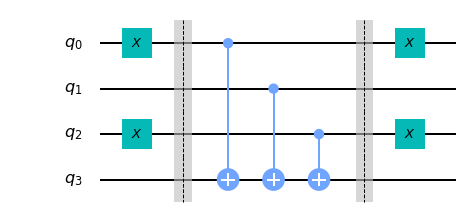

In [8]:
balanced_oracle.barrier()
for index, value in enumerate(b_str):
    if value == '1':
        balanced_oracle.x(index)

balanced_oracle.draw(output='mpl')

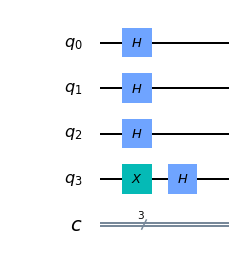

In [9]:
dj_circuit = QuantumCircuit(n+1, n)

for qubit in range(n):
    dj_circuit.h(qubit)
    
dj_circuit.x(n)
dj_circuit.h(n)

dj_circuit.draw(output='mpl')

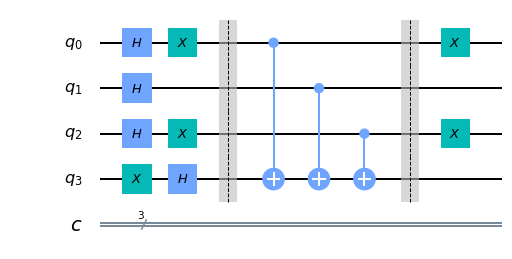

In [10]:
dj_circuit += balanced_oracle
dj_circuit.draw(output='mpl')

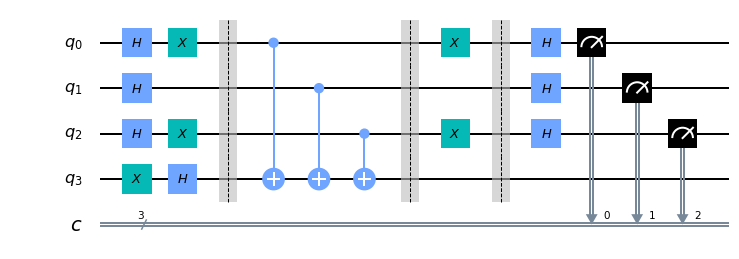

In [11]:
dj_circuit.barrier()
for qubit in range(n):
    dj_circuit.h(qubit)
    dj_circuit.measure(qubit, qubit)
    
dj_circuit.draw(output='mpl')

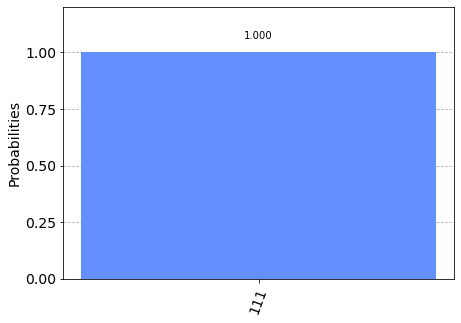

In [12]:
backend = BasicAer.get_backend('qasm_simulator')
count = execute(dj_circuit, backend).result().get_counts()
plot_histogram(count)

In [13]:
def dj_oracle(case, n, b_str):
    dj_oracle = QuantumCircuit(n+1)
    if case == 'balanced':
        for index, value in enumerate(b_str):
            if value == '1':
                dj_oracle.x(index)
        for qubit in range(n):
            dj_oracle.cx(qubit, n)
        for index, value in enumerate(b_str):
            if value == '1':
                dj_oracle.x(index)  
                
    elif case == 'constant':
        if b_str == '0':
            pass
        elif b_str == '1':
            dj_oracle.x(n)
    
    dj_oracle_gate = dj_oracle.to_gate()
    dj_oracle_gate.name = 'Oracle'
    return dj_oracle_gate

In [14]:
def dj_circuit(oracle, n):
    dj_circuit = QuantumCircuit(n+1, n)
    for qubit in range(n):
        dj_circuit.h(qubit)
    dj_circuit.x(n)
    dj_circuit.h(n)
    
    dj_circuit.barrier()
    dj_circuit.append(oracle, range(n+1))
    
    dj_circuit.barrier()
    for qubit in range(n):
        dj_circuit.h(qubit)
        
    for qubit in range(n):
        dj_circuit.measure(qubit, qubit)
        
    return dj_circuit

In [15]:
n = 2
oracle = dj_oracle('constant', n, '1')
dj_Circuit = dj_circuit(oracle, n)

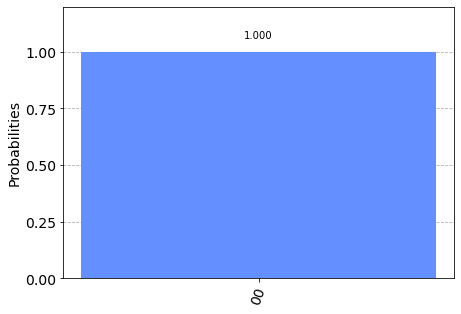

In [16]:
backend = BasicAer.get_backend('qasm_simulator')
count = execute(dj_Circuit, backend).result().get_counts()
plot_histogram(count)

In [17]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [18]:
from qiskit.providers.ibmq import least_busy
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits > 3 and
                                      not b.configuration().simulator and b.status().operational == True))

In [19]:
job_dj_circuit = execute(dj_Circuit, backend, shots=1024)

{'11': 2, '10': 98, '00': 890, '01': 34}


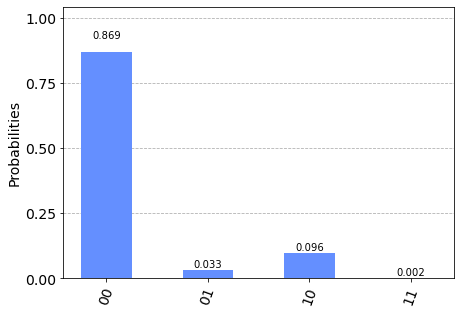

In [20]:
job_dj_circuit_result = job_dj_circuit.result()
job_dj_circuit_count = job_dj_circuit_result.get_counts()
print(job_dj_circuit_count)
plot_histogram(job_dj_circuit_count)

In [21]:
backend

<IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>

In [24]:
accuracy = round((job_dj_circuit_count['00'] / 1024)*100, 2)
print('The accuracy is {}%'.format(accuracy))

The accuracy is 86.91%
